In [3]:
%cd ..

/Users/jannes/Documents/Science/Real-Projects/P3-JP-Synapse-Paper/git-p3/learning_as_filtering


In [4]:
ls

README.md  figures/   main.py    notebooks/ pkl_data/  src/       util/


In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from src.plotting import *
from src.update_functions import *
from src.init_functions import *
from src.run_functions import *

def expspace(a0, an, n=50):
    """ linspace in exp space """
    return (a0 * np.exp(np.log(an / a0) * np.linspace(0, 1, n)))

In [6]:
p = {'t_num': 2000,
     'dt': 0.001,
     'dim':2,
     'tau':0.025,
     'g0':1,
     'beta':0.5,
     'mu_ou':0,
     'sig2_ou':1,     
     'tau_ou':1000, # s
     'rule':'corr'}
p['g0dt'] = p['g0']*p['dt']

# STDP
p['delta_T'] = 0.01
p['wait'] = 0.5 # s

# correlation protocol
p['correlated_times'] = np.array([0, 0.01]) # s, two spikes

# bias
p['include-bias'] = False
p['sig2_oub'] = 1
p['tau_oub'] = 0.025
p['mu_oub'] = 1.0
# spike response
p['include-spike-response-kernel'] = True
p['tau_alpha'] = 0.025
p['amplitude_alpha'] = -3/p['beta']
# single vector rules
p['tau_z'] = 1

# performance sims:
p['epoch_num'] = 10
p['epoch_wait'] = 2
p['rate'] = 40 # Hz

Performance simulation 

In [7]:
p['tau_ou'] = 2
p['tau_z'] = 2
p['beta'] = 0.1
p['dim'] = 5
p['dt'] = 0.001
p['rule'] = 'exp-rm'
p['include-spike-response-kernel'] = False
p['include-bias'] = False

out,v = run_simulation(p,verbose=True,online=False)

In [8]:
A = p['sig2_ou']*p['beta']**2*p['g0dt']/p['dt']*p['tau_ou']/2
out.mean()

MSE            0.826670
L             -0.000011
L_pt          -0.000003
gbar_gg_one    0.000000
gmap_gg_one    0.000000
gdt_gg_one     0.000000
dtype: float64

0

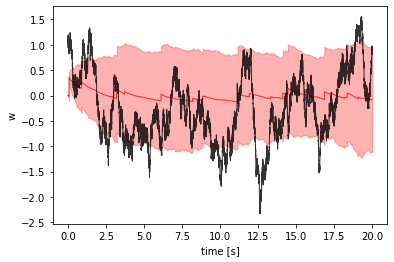

In [9]:
vplt(v,p,key='filter',dim=1,cut=1,c=None,err=True,alpha=0.8)

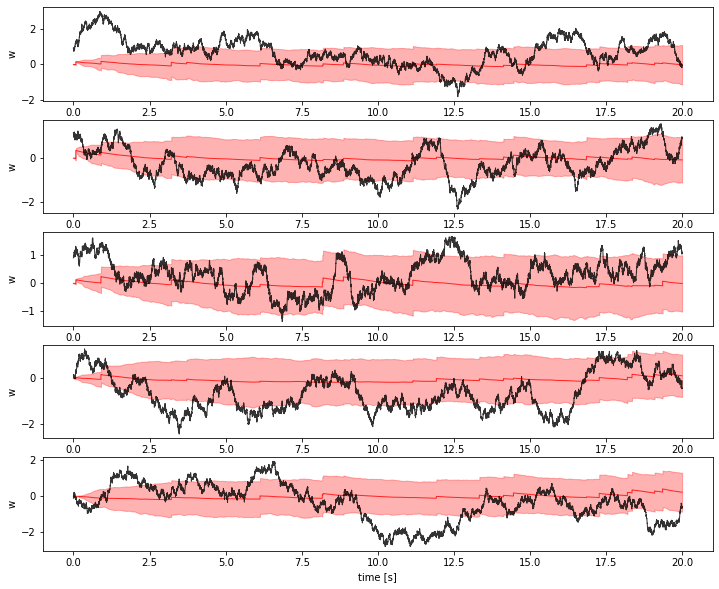

In [10]:
f,axs = plt.subplots(p['dim'],1,figsize=[12,10])
for dim,ax in zip(range(p['dim']),axs.reshape(-1)):
    plt.sca(ax)
    vplt(v,p,key='filter',dim=dim,cut=1,c=None,err=True,alpha=0.8)

In [11]:
import itertools as it

In [438]:
p['tau_ou'] = 2
p['tau_z'] = 2
p['beta'] = 0.1
p['dim'] = 5
p['dt'] = 0.001
p['include-spike-response-kernel'] = False
p['include-bias'] = False

mp = {'betas': expspace(0.001,0.1,5), 'rules': ('exp','corr','exp-oja','exp-rm'), 'repeats': range(10)}
length = len(list(it.product(mp['betas'], mp['rules'], mp['repeats'])))
res = []
for count, (beta, rule, repeat) in enumerate(it.product(mp['betas'], mp['rules'], mp['repeats'])):    
    print(count,'/',length,'rule:',rule,'beta:',beta)
    p['rule'] = rule
    p['beta'] = beta
    out,v = run_simulation(p,verbose=True,online=False)
    out = out.mean().to_dict()
    out.update({'beta':beta,'rule':rule})
    res.append(out)    
res = pd.DataFrame(res)

0 / 200 rule: exp beta: 0.001
1 / 200 rule: exp beta: 0.001
2 / 200 rule: exp beta: 0.001
3 / 200 rule: exp beta: 0.001
4 / 200 rule: exp beta: 0.001
5 / 200 rule: exp beta: 0.001
6 / 200 rule: exp beta: 0.001
7 / 200 rule: exp beta: 0.001
8 / 200 rule: exp beta: 0.001
9 / 200 rule: exp beta: 0.001
10 / 200 rule: corr beta: 0.001
11 / 200 rule: corr beta: 0.001
12 / 200 rule: corr beta: 0.001
13 / 200 rule: corr beta: 0.001
14 / 200 rule: corr beta: 0.001
15 / 200 rule: corr beta: 0.001
16 / 200 rule: corr beta: 0.001
17 / 200 rule: corr beta: 0.001
18 / 200 rule: corr beta: 0.001
19 / 200 rule: corr beta: 0.001
20 / 200 rule: exp-oja beta: 0.001
21 / 200 rule: exp-oja beta: 0.001
22 / 200 rule: exp-oja beta: 0.001
23 / 200 rule: exp-oja beta: 0.001
24 / 200 rule: exp-oja beta: 0.001
25 / 200 rule: exp-oja beta: 0.001
26 / 200 rule: exp-oja beta: 0.001
27 / 200 rule: exp-oja beta: 0.001
28 / 200 rule: exp-oja beta: 0.001
29 / 200 rule: exp-oja beta: 0.001
30 / 200 rule: exp-rm beta: 0.

182 / 200 rule: exp-oja beta: 0.10000000000000005
183 / 200 rule: exp-oja beta: 0.10000000000000005
184 / 200 rule: exp-oja beta: 0.10000000000000005
185 / 200 rule: exp-oja beta: 0.10000000000000005
186 / 200 rule: exp-oja beta: 0.10000000000000005
187 / 200 rule: exp-oja beta: 0.10000000000000005
188 / 200 rule: exp-oja beta: 0.10000000000000005
189 / 200 rule: exp-oja beta: 0.10000000000000005
190 / 200 rule: exp-rm beta: 0.10000000000000005
191 / 200 rule: exp-rm beta: 0.10000000000000005
192 / 200 rule: exp-rm beta: 0.10000000000000005
193 / 200 rule: exp-rm beta: 0.10000000000000005
194 / 200 rule: exp-rm beta: 0.10000000000000005
195 / 200 rule: exp-rm beta: 0.10000000000000005
196 / 200 rule: exp-rm beta: 0.10000000000000005
197 / 200 rule: exp-rm beta: 0.10000000000000005
198 / 200 rule: exp-rm beta: 0.10000000000000005
199 / 200 rule: exp-rm beta: 0.10000000000000005


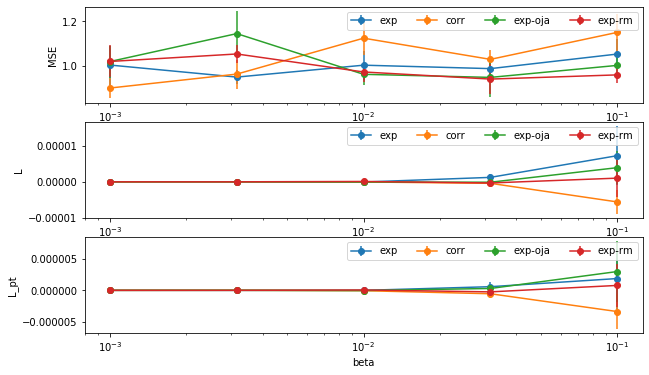

In [443]:
res2 = res.drop(list(res.columns)[3:6],axis=1)
mean = res2.groupby(['rule','beta']).mean()
sem = res2.groupby(['rule','beta']).sem()

f,axs = plt.subplots(3,1,figsize=[10,6])
for metric,ax in zip(('MSE','L','L_pt'),axs.reshape(-1)):
    ax.set_ylabel(metric)
    for rule in mp['rules']:
        mean.loc[rule,metric].plot(label=rule,ax=ax,marker='o',yerr=sem.loc[rule,metric])
    ax.legend(ncol=len(mp['rules']))
    ax.set_xscale('log')

# STDP / Heterosynaptic plasticity 

In [16]:
mp = {'num_delta_T':21,
      'delta_T_max':0.1,
      'delta_T_min':-0.1}

Compare two rules for single time series

In [17]:
test_rule = 'exp-rm'
p['rule'] = test_rule
p['delta_T'] = 0.1
p['dim'] = 1
v, states = run_timeseries(p,hetero=False)

p['rule'] = 'corr'
v2, states = run_timeseries(p,hetero=False)

#p['rule'] = 'corr'
#v2, states = run_timeseries(p,hetero=False)

TypeError: vplt() got an unexpected keyword argument 'c'

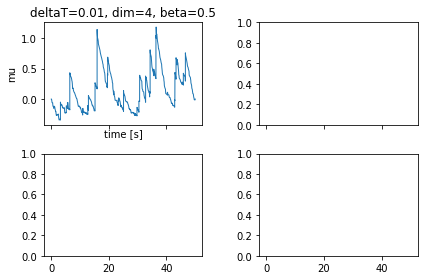

In [189]:
fig, axs = plt.subplots(2,2,tight_layout=True, sharex=True)
plt.sca(axs[0,0])
vplt(v,p,'mu',0) #, plt.xlim([0.45,.55])
plt.title('deltaT={0}, dim={1}, beta={2}'.format(p['delta_T'],p['dim'],p['beta']))
plt.sca(axs[0,1])

vplt(v2,p,'mu',0,c='red') #, plt.xlim([0.45,.55])
plt.title('deltaT={0}, dim={1}, beta={2}'.format(p['delta_T'],p['dim'],p['beta']))

plt.sca(axs[1,0])
vplt(v,p,'sig2',0) #, plt.xlim([0.45,.55])
#plt.title('sig2(t) and z(t)')
plt.ylabel('z(t)')
plt.sca(axs[1,1])
vplt(v2,p,'sig2',0,c='red') #, plt.xlim([0.45,.55])
#plt.title('sig2(t) and z(t)')
#plt.gca().legend(['exp-z','corr'])

Compare STDP protocol for two rules

In [19]:
p['dim'] = 1
p['rule'] = test_rule
out = run_STDP(mp,p)
p['rule'] = 'corr'
out2 = run_STDP(mp,p)

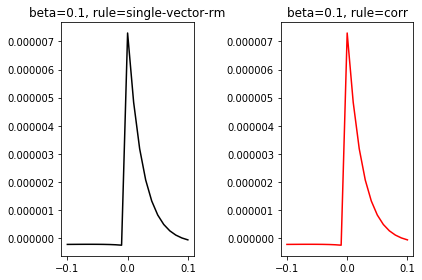

In [20]:
d = 0
def plt_stdp(out,d=0,c='k'):
    xplt, dmu = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out]).T
    plt.plot(xplt,dmu,c=c)
    plt.title('beta={0}, rule={1}'.format(p['beta'],p['rule']))

fig, axs = plt.subplots(1,2,tight_layout=True)
plt.sca(axs[0])
p['rule'] = test_rule
plt_stdp(out)
p['rule'] = 'corr'
plt.sca(axs[1])
plt_stdp(out2,c='red')
#plt.gca().legend(['exp-z','corr'])

In [21]:
p['rule'] = 'corr' # SF
p['dim'] = 2
v, states = run_timeseries(p,hetero=True)
out = run_STDP(mp,p,hetero=True)

p['rule'] = test_rule
v2, states = run_timeseries(p,hetero=True)
out2 = run_STDP(mp,p,hetero=True)

In [22]:
A = p['beta']**2*(p['g0dt']/p['dt'])*p['tau_ou'] # OK 
A

0.010000000000000002

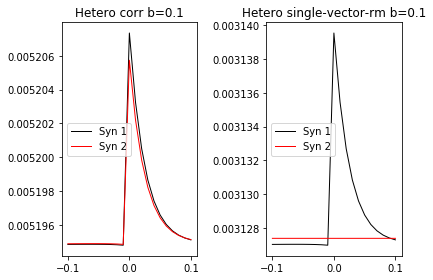

In [23]:
fig, axs = plt.subplots(1,2,tight_layout=True)
for i, out_i, rule in zip([0,1],[out,out2],['corr',test_rule] ):
    plt.sca(axs[i])
    d = 0
    xplt, dmu = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out_i]).T
    d = 1
    xplt, dmu2 = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out_i]).T
    plt.plot(xplt,dmu,c='k',lw=1,label='Syn 1')
    plt.plot(xplt,dmu2,c='red',lw=1,label='Syn 2')
    plt.gca().legend()
    plt.title('Hetero {1} b={0}'.format(p['beta'],rule))
